In [1]:
import numpy as np, healpy as hp, pickle, prjlib, curvedsky, plottools as pl, tqdm
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import matplotlib.ticker
params = {
    'figure.figsize':[6,4],
    'axes.labelsize': 16,
    'legend.fontsize': 14,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'text.usetex': True,
    'font.family': "Times New Roman", 
    }
plt.rcParams.update(params)

In [2]:
ntype = 'base'
types = ['id','la','co','LA']
num = 50
p = {}
p['id'] = prjlib.analysis_init(t='id',ntype='cv')
p['LA'] = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype=ntype+'_roll50')
p['la'] = prjlib.analysis_init(t='la',freq='com',fltr='cinv',ntype=ntype+'_roll50')
p['co'] = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype=ntype+'_roll50')
fig_kwargs = {'xlabsize':18,'ylabsize':18,'xticks_labsize':16,'yticks_labsize':16,'legend_size':16}

In [3]:
lmax, l = {}, {}
for c in types: lmax[c] = 4096
lmax['co'] = 2048
for c in types: l[c] = np.linspace(0,lmax[c],lmax[c]+1)

In [4]:
rhoE, rhoB = {}, {} 
for c in types:
    if c=='id': continue
    rhoE[c], rhoB[c] = np.loadtxt('../../data/sodelens/paper/2021_pipeline/cinv_rho_'+c+'.dat',unpack=True)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


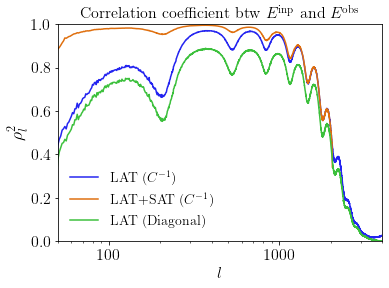

In [5]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim(50,4000)
ax.set_ylim(0.,1.)
ax.set_xscale('log')
ax.set_xlabel(r'$l$',fontsize=16)
ax.set_ylabel(r'$\rho_l^2$',fontsize=18)
plt.gcf().subplots_adjust(left=0.15)
for c, lab in zip(types,['',r'LAT ($C^{-1}$)',r'LAT+SAT ($C^{-1}$)',r'LAT (Diagonal)']):
    if c=='id': continue
    ax.plot(l[c],rhoE[c],label=lab)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
title(r'Correlation coefficient btw $E^{\rm inp}$ and $E^{\rm obs}$',fontsize=16)
legend()
savefig('fig_cinv_rho_EE.pdf')

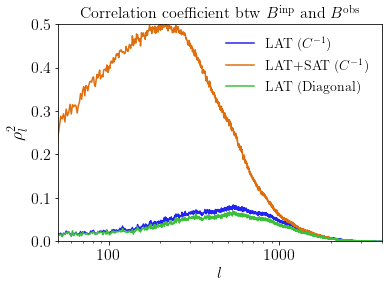

In [6]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim(50,4000)
ax.set_ylim(0.,.5)
ax.set_xscale('log')
ax.set_xlabel(r'$l$',fontsize=16)
ax.set_ylabel(r'$\rho_l^2$',fontsize=18)
plt.gcf().subplots_adjust(left=0.15)
for c, lab in zip(types,['',r'LAT ($C^{-1}$)',r'LAT+SAT ($C^{-1}$)',r'LAT (Diagonal)']):
    if c=='id': continue
    ax.plot(l[c],rhoB[c],label=lab)
title(r'Correlation coefficient btw $B^{\rm inp}$ and $B^{\rm obs}$',fontsize=16)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
legend()
savefig('fig_cinv_rho_BB.pdf')